In [1]:
import keras 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv('titanic_data.csv' , sep = '\t')

In [3]:
input_names = ['Age','Sex','Pclass']
output_names = ['Survived']

In [4]:
data
# SibSp - number of brothers/sister/spouce aboard
# Parch - number of parents / children
# Fare - ticket price
# Embarked - port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# remove features with unique values
drop_cols = ['PassengerId','Name','Ticket','Cabin']
data = data.drop(drop_cols,axis=1)

In [6]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,male,NaN,0,0,8.0500,S
1305,1,1,female,39.0,0,0,108.9000,C
1306,0,3,male,38.5,0,0,7.2500,S
1307,0,3,male,NaN,0,0,8.0500,S


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


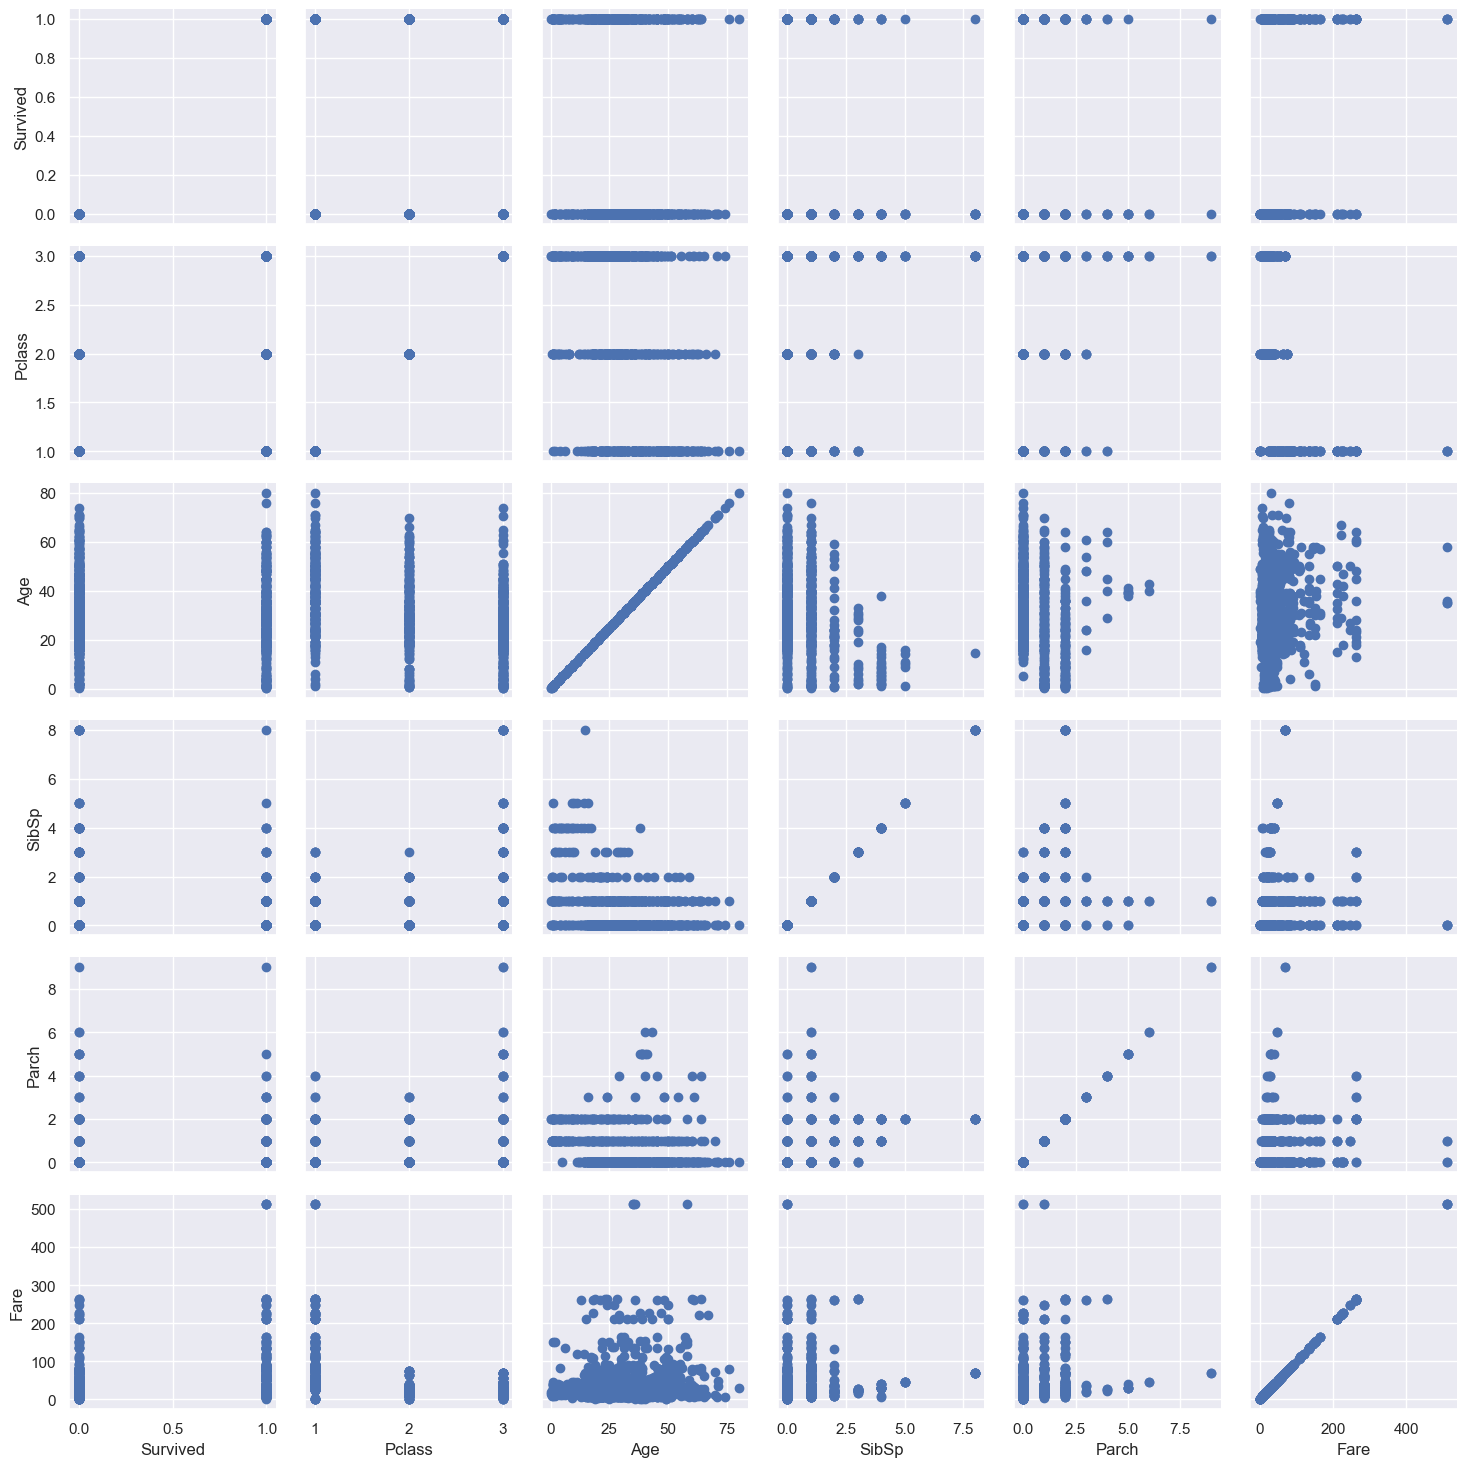

In [9]:
pair_grid_plot = sns.PairGrid(data)
pair_grid_plot.map(plt.scatter)

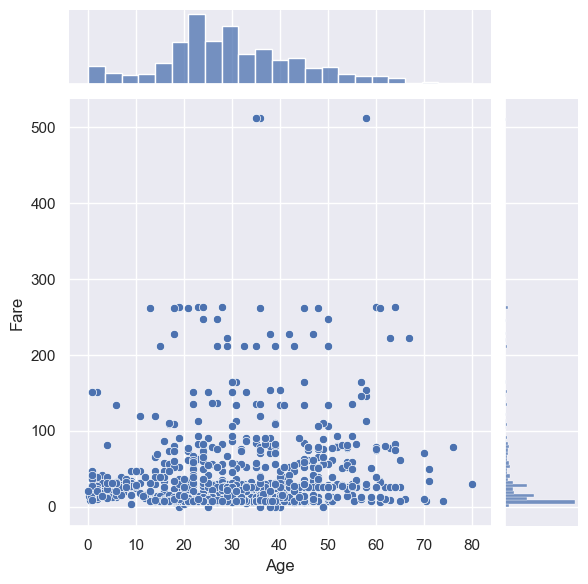

In [10]:
# distribution of age and fare 
sns.jointplot(x = 'Age', y = 'Fare', data = data)

In [11]:
# the most frequent price is the cheapest

<Axes: ylabel='Age'>

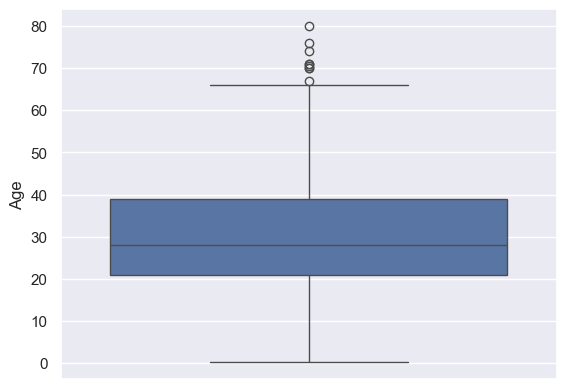

In [12]:
sns.boxplot(data['Age'])

<Axes: xlabel='Survived', ylabel='count'>

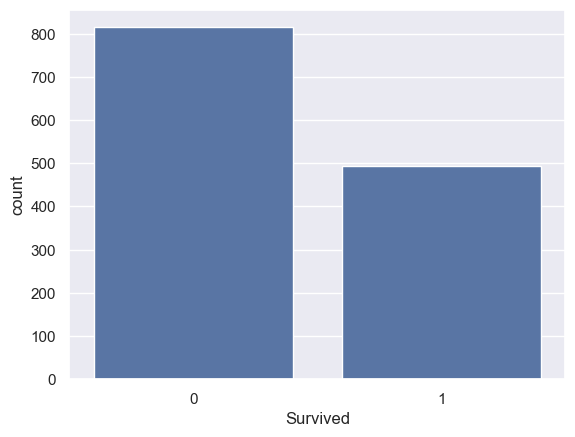

In [13]:
sns.countplot(x = 'Survived', data = data)

In [14]:
# how the gender affects survival?

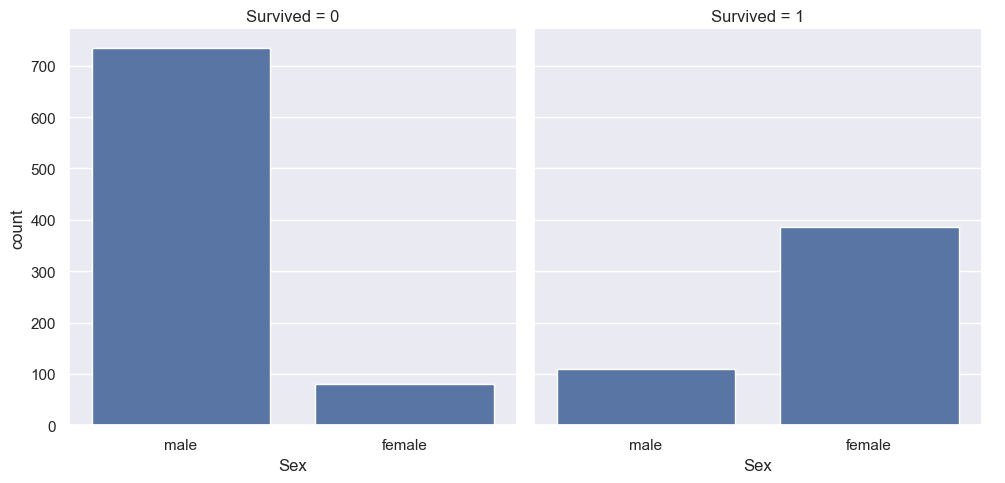

In [15]:
sns.catplot(x = 'Sex', col = 'Survived', kind = 'count', data = data)

In [16]:
# the probability of surviving on the Titanic is much higher for a woman than for a man

In [17]:
men = data[data.Sex=='male']
women = data[data.Sex=='female']
print('Probability to survive for man:', men.Survived.sum()/men.Survived.count()*100)
print('Probability to survive for woman:', women.Survived.sum()/women.Survived.count()*100)

Probability to survive for man: 12.930011862396205
Probability to survive for woman: 82.61802575107296


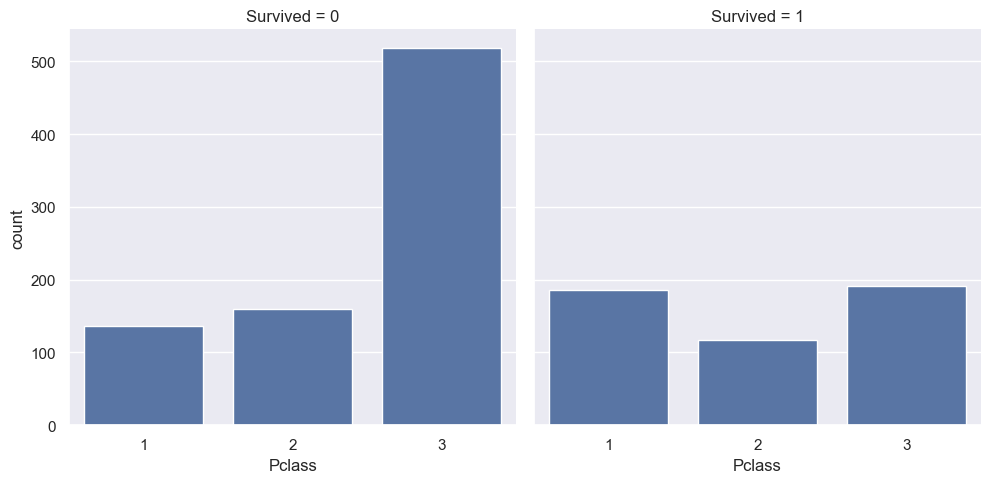

In [18]:
sns.catplot(x = 'Pclass', col = 'Survived', kind = 'count', data = data)

In [19]:
# percent of dead people in 3rd class is much higher then in 1st and 2nd

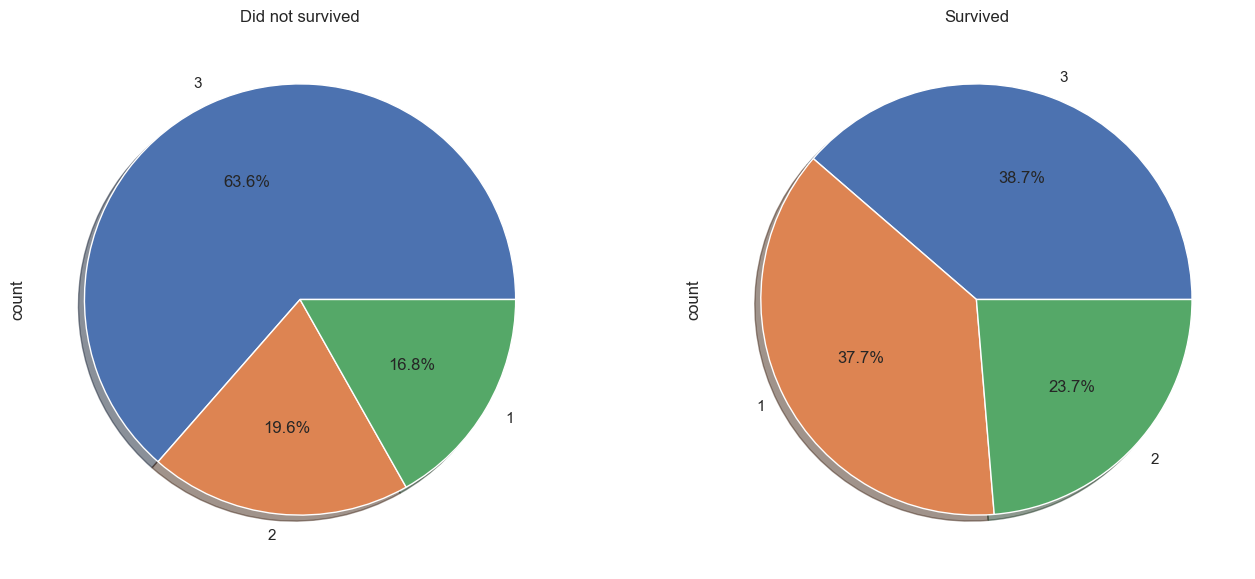

In [20]:
# distribution of survivals by classes
f,ax=plt.subplots(1,2,figsize=(16,7))
data['Pclass'][data['Survived']==0].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
data['Pclass'][data['Survived']==1].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Did not survived')
ax[1].set_title('Survived')
plt.show()

In [21]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,137,186,323
2,160,117,277
3,518,191,709
All,815,494,1309


In [22]:
# how the proportion of survivors changed depending on the cabin class

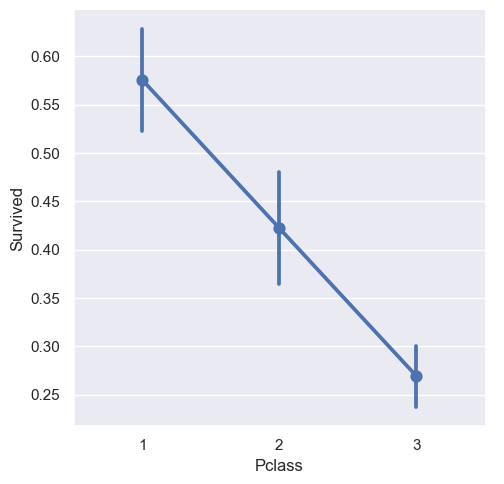

In [23]:
sns.catplot(x='Pclass',y='Survived', kind = 'point', data = data)

In [24]:
# probability to survive in each class
data_1 = data[data.Pclass == 1]
data_2 = data[data.Pclass == 2]
data_3 = data[data.Pclass == 3]
print("% of survivals in") 
print("Pclass=1 : ", data_1.Survived.sum()/data_1.Survived.count())
print("Pclass=2 : ", data_2.Survived.sum()/data_2.Survived.count())
print("Pclass=3 : ", data_3.Survived.sum()/data_3.Survived.count())

% of survivals in
Pclass=1 :  0.5758513931888545
Pclass=2 :  0.4223826714801444
Pclass=3 :  0.2693935119887165


In [25]:
# probability to survive in 1st class was the highest

In [26]:
# probability to survive in 1st class for woman is almost 100%
data_1[data_1.Sex=='female'].Survived.sum()/data_1[data_1.Sex=='female'].Survived.count()

0.9791666666666666

In [27]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins = True).style.background_gradient(cmap = 'autumn_r')

In [28]:
# 3rd class men died the most

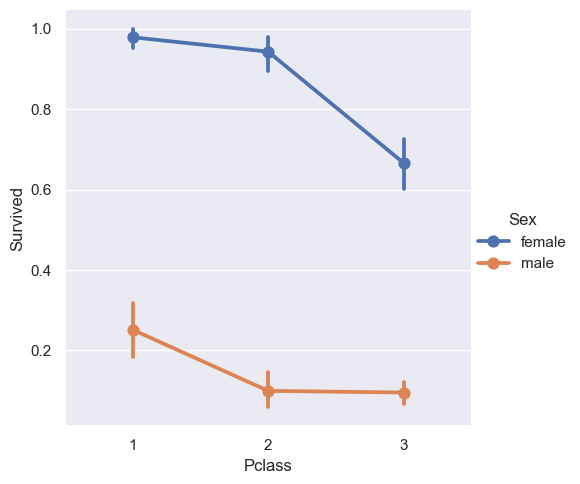

In [32]:
# proportion of survivors depending on the cabin class and sex
sns.catplot(x='Pclass',y='Survived',hue = 'Sex', kind = 'point', data = data)

In [ ]:
# add port of embarkation to analysis

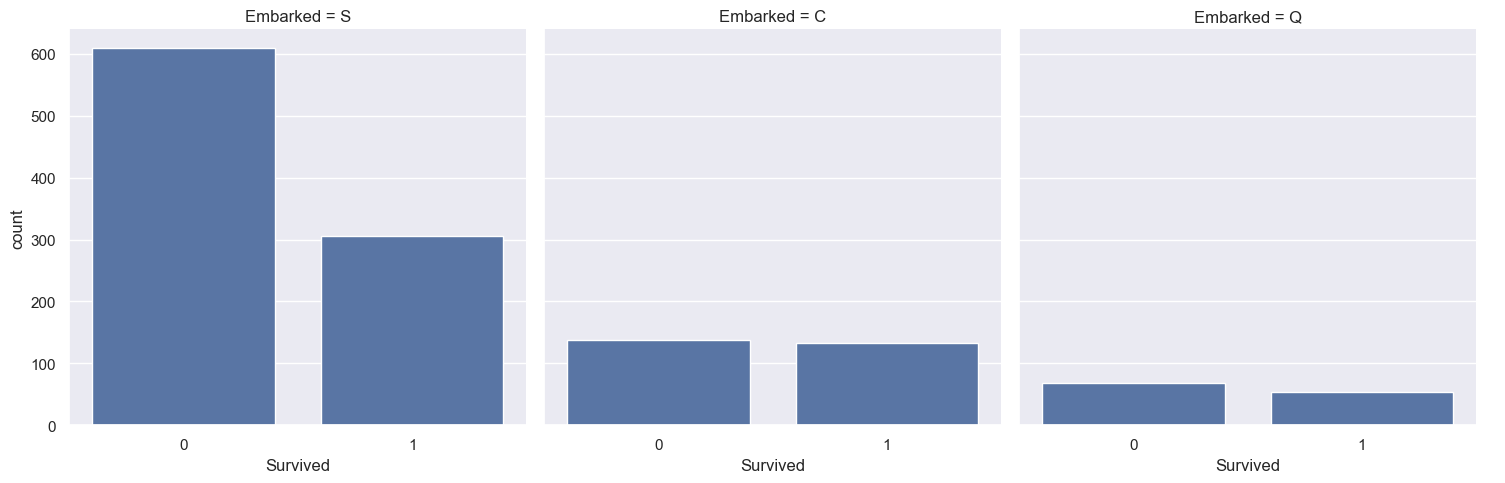

In [33]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=data)

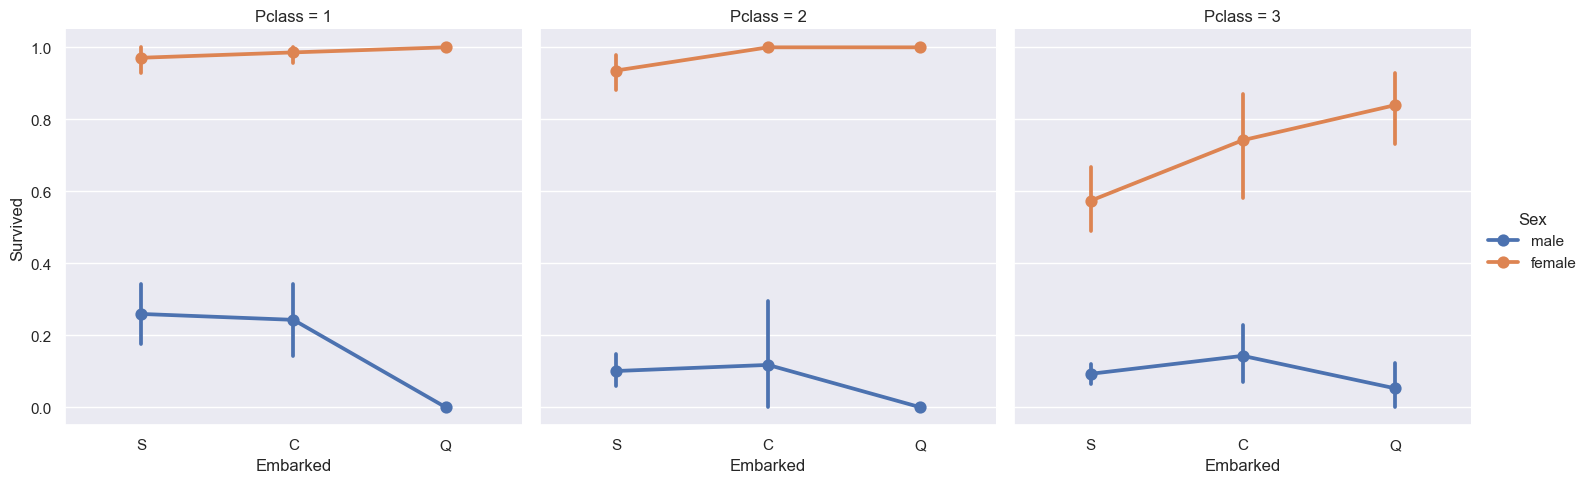

In [34]:
sns.catplot(x='Embarked',y='Survived', col='Pclass', hue= 'Sex', kind='point', data = data)

In [36]:
pd.crosstab([data.Survived], [data.Sex, data.Pclass, data.Embarked], margins=True).style.background_gradient(cmap ='autumn_r')

In [40]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,male,NaN,0,0,8.0500,S
1305,1,1,female,39.0,0,0,108.9000,C
1306,0,3,male,38.5,0,0,7.2500,S
1307,0,3,male,NaN,0,0,8.0500,S


In [49]:
data['Embarked'].unique()

array(['S', 'C', 'Q', 'none'], dtype=object)

In [47]:
data['Sex'].unique()

array([0, 1], dtype=int64)

In [48]:
data['Embarked'] = data['Embarked'].fillna('none')

In [50]:
data['Embarked'].unique()

array(['S', 'C', 'Q', 'none'], dtype=object)

In [55]:
data['Age'] = data['Age'].fillna(data.Age.mean())

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(np.array(data['Age']).reshape(-1,1))
data['Fare'] = scaler.fit_transform(np.array(data['Fare']).reshape(-1,1))

In [72]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,0.273456,1,0,0.014151,2
1,1,1,1,0.473882,1,0,0.139136,0
2,1,3,1,0.323563,0,0,0.015469,2
3,1,1,1,0.436302,1,0,0.103644,2
4,0,3,0,0.436302,0,0,0.015713,2
...,...,...,...,...,...,...,...,...
1304,0,3,0,0.372180,0,0,0.015713,2
1305,1,1,1,0.486409,0,0,0.212559,0
1306,0,3,0,0.480145,0,0,0.014151,2
1307,0,3,0,0.372180,0,0,0.015713,2


In [73]:
corr = data.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.264710,0.688371,-0.048483,0.002370,0.108919,0.233622,-0.132420
Pclass,-0.264710,1.000000,-0.124617,-0.366371,0.060832,0.018322,-0.558629,0.182154
Sex,0.688371,-0.124617,1.000000,-0.057397,0.109609,0.213125,0.185523,-0.095215
Age,-0.048483,-0.366371,-0.057397,1.000000,-0.190747,-0.130872,0.171893,-0.068091
SibSp,0.002370,0.060832,0.109609,-0.190747,1.000000,0.373587,0.160238,0.064519
Parch,0.108919,0.018322,0.213125,-0.130872,0.373587,1.000000,0.221539,0.043835
Fare,0.233622,-0.558629,0.185523,0.171893,0.160238,0.221539,1.000000,-0.235763
Embarked,-0.132420,0.182154,-0.095215,-0.068091,0.064519,0.043835,-0.235763,1.000000


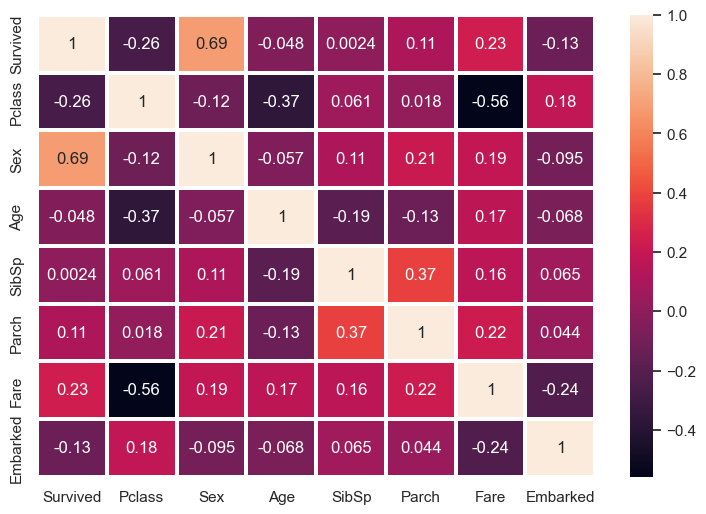

In [74]:
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 ,ax=ax)
plt.show()

In [75]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [76]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,0.273456,1,0,0.014151,2
1,1,1,0.473882,1,0,0.139136,0
2,3,1,0.323563,0,0,0.015469,2
3,1,1,0.436302,1,0,0.103644,2
4,3,0,0.436302,0,0,0.015713,2
...,...,...,...,...,...,...,...
1304,3,0,0.372180,0,0,0.015713,2
1305,1,1,0.486409,0,0,0.212559,0
1306,3,0,0.480145,0,0,0.014151,2
1307,3,0,0.372180,0,0,0.015713,2


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [78]:
X_train.shape

(1112, 7)

In [81]:
X_test.shape

(197, 7)

In [87]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(7, )))
model.add(keras.layers.Dense(units=20,activation='relu'))
model.add(keras.layers.Dense(units=5,activation='relu'))
model.add(keras.layers.Dense(units=1,activation='sigmoid'))

model.summary()


C:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271 (1.06 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
model.compile(loss='mse',optimizer='sgd',metrics=['accuracy'])

In [89]:
fit_results = model.fit(x=X_train,y=y_train,epochs=50,validation_split=0.2)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5618 - loss: 0.2528 - val_accuracy: 0.6233 - val_loss: 0.2487
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6199 - loss: 0.2485 - val_accuracy: 0.6233 - val_loss: 0.2476
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6386 - loss: 0.2470 - val_accuracy: 0.6233 - val_loss: 0.2465
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6244 - loss: 0.2462 - val_accuracy: 0.6233 - val_loss: 0.2456
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6095 - loss: 0.2459 - val_accuracy: 0.6233 - val_loss: 0.2447
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6183 - loss: 0.2447 - val_accuracy: 0.6233 - val_loss: 0.2438
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6161 - loss: 0.2441 - val_accuracy: 0.6233 - val_loss: 0.2431
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6215 - loss: 0.2430 - val_accuracy: 0.6233 - val_loss

In [91]:
test_loss, test_acc = model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5769 - loss: 0.2454 


In [92]:
#model.load_weights('weight.h5')

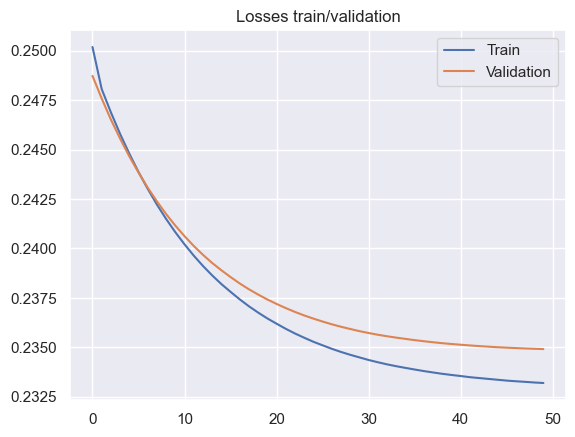

In [93]:
plt.title('Losses train/validation')
plt.plot(fit_results.history['loss'],label='Train')
plt.plot(fit_results.history['val_loss'],label='Validation')
plt.legend()
plt.show()

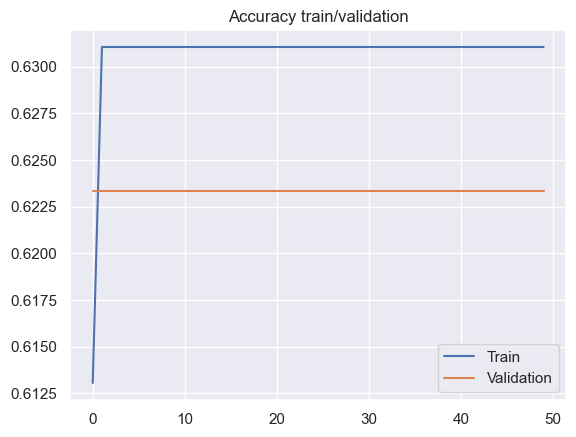

In [94]:
plt.title('Accuracy train/validation')
plt.plot(fit_results.history['accuracy'],label='Train')
plt.plot(fit_results.history['val_accuracy'],label='Validation')
plt.legend()
plt.show()

In [96]:
predicted_test = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [98]:
real_data = data[-10:][input_names+output_names]
real_data = real_data.reset_index(drop=True)

In [99]:
real_data['Psurvived'] = predicted_test

ValueError: Length of values (197) does not match length of index (10)

In [100]:
real_data['Psurvived_binary'] = pd.Series(map(lambda q: 0 if q<0.5 else 1,real_data['Psurvived']))

KeyError: 'Psurvived'

In [101]:
real_data

,Age,Sex,Pclass,Survived
0,0.372180,1,3,1
1,0.035450,1,3,1
2,0.372180,1,3,1
3,0.461355,1,1,1
4,0.348616,1,3,1
5,0.372180,0,3,0
6,0.486409,1,1,1
7,0.480145,0,3,0
8,0.372180,0,3,0
9,0.372180,0,3,0
